In [27]:
import numpy as np
import seaborn as sns

import tensorflow.keras.layers as layers
import tensorflow.keras.backend as backend
import tensorflow.keras.models as models
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential

from imutils import paths
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os

In [2]:
all_categories = os.listdir("101_ObjectCategories")
print(all_categories)

['gerenuk', 'hawksbill', 'headphone', 'ant', 'butterfly', 'lamp', 'strawberry', 'water_lilly', 'chandelier', 'dragonfly', 'crab', 'pagoda', 'dollar_bill', 'emu', 'inline_skate', 'platypus', 'dalmatian', 'cup', 'airplanes', 'joshua_tree', 'cougar_body', 'grand_piano', 'trilobite', 'brontosaurus', 'wild_cat', 'pigeon', 'dolphin', 'soccer_ball', 'wrench', 'scorpion', 'flamingo_head', 'nautilus', 'accordion', 'cougar_face', 'pyramid', 'camera', 'barrel', 'schooner', 'cellphone', 'panda', 'revolver', 'lobster', 'menorah', 'lotus', 'stapler', 'crocodile', 'chair', 'helicopter', 'minaret', 'starfish', 'ceiling_fan', 'ketch', 'mayfly', 'wheelchair', 'bass', 'yin_yang', 'crocodile_head', 'saxophone', 'beaver', 'mandolin', 'bonsai', 'Leopards', 'car_side', 'ibis', 'electric_guitar', 'kangaroo', 'stegosaurus', 'ferry', 'snoopy', 'umbrella', 'rhino', 'okapi', 'watch', 'brain', 'gramophone', 'scissors', 'rooster', 'cannon', 'binocular', 'anchor', 'octopus', 'buddha', 'laptop', 'windsor_chair', 'hed

image loaded
(96, 96, 3)


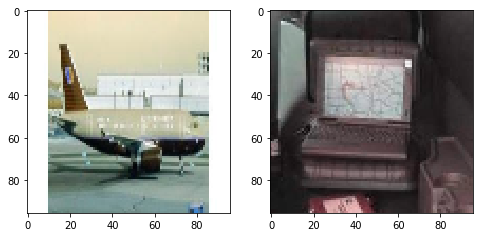

In [16]:
LABELS = ["Faces", "Leopards", "Motorbikes", "airplanes","accordion","ant","buddha",'laptop',
          'elephant','anchor']

imagePaths = list(paths.list_images("101_ObjectCategories"))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
 
    if label not in LABELS:
        continue
 
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (96, 96))
 
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
    
print("image loaded")

print(data[0].shape)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(data[123])
plt.subplot(1,2,2)
plt.imshow(data[1234])

In [17]:
data = np.array(data) / 255

data.shape

(2602, 96, 96, 3)

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

binarizer = LabelBinarizer()

labels = binarizer.fit_transform(labels)

x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.3)

In [19]:
from resnet_builder import resnet50 as rn50

10

In [20]:
model = rn50((96,96,3),10)

In [21]:
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [25]:
tboard = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test), callbacks=[tboard])

Train on 1821 samples, validate on 781 samples
Epoch 1/10
1821/1821 [==============================] - 35s 19ms/sample - loss: 1.1811 - acc: 0.5942 - val_loss: 0.8456 - val_acc: 0.7618
Epoch 2/10
1821/1821 [==============================] - 36s 20ms/sample - loss: 0.9421 - acc: 0.7035 - val_loss: 0.7256 - val_acc: 0.7900
Epoch 3/10
1821/1821 [==============================] - 37s 20ms/sample - loss: 0.7391 - acc: 0.7781 - val_loss: 0.7057 - val_acc: 0.8015
Epoch 4/10
1821/1821 [==============================] - 37s 20ms/sample - loss: 0.5843 - acc: 0.8100 - val_loss: 0.5649 - val_acc: 0.8374
Epoch 5/10
1821/1821 [==============================] - 40s 22ms/sample - loss: 0.4773 - acc: 0.8369 - val_loss: 0.4728 - val_acc: 0.8604
Epoch 6/10
1821/1821 [==============================] - 36s 20ms/sample - loss: 0.4201 - acc: 0.8567 - val_loss: 0.4343 - val_acc: 0.8745
Epoch 7/10
1821/1821 [==============================] - 36s 20ms/sample - loss: 0.3571 - acc: 0.8797 - val_loss: 0.3886 - val

In [49]:
model = Sequential(name="ConvOnly")

In [50]:
model.add(layers.Conv2D(16,(5,5),padding="same", activation="relu",input_shape=(96,96,3)))
model.add(layers.Conv2D(32,(5,5),padding="same", activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(32,(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(64,(3,3),padding="same", activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128,(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(256,(3,3),padding="same", activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(512,(3,3),strides=(2,2),padding="same", activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(1024,activation="relu"))
model.add(layers.Dense(512,activation="relu"))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))


model.summary()

In [51]:
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [52]:
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test), callbacks=[tboard])

Train on 1821 samples, validate on 781 samples
Epoch 1/10
1821/1821 [==============================] - 64s 35ms/sample - loss: 2.1948 - acc: 0.2619 - val_loss: 1.7850 - val_acc: 0.3047
Epoch 2/10
1821/1821 [==============================] - 68s 37ms/sample - loss: 1.7871 - acc: 0.3267 - val_loss: 1.7515 - val_acc: 0.3047
Epoch 3/10
1821/1821 [==============================] - 63s 35ms/sample - loss: 1.7353 - acc: 0.3059 - val_loss: 1.7842 - val_acc: 0.4994
Epoch 4/10
1821/1821 [==============================] - 63s 35ms/sample - loss: 1.4042 - acc: 0.5080 - val_loss: 1.1165 - val_acc: 0.6504
Epoch 5/10
1821/1821 [==============================] - 63s 35ms/sample - loss: 0.9804 - acc: 0.6837 - val_loss: 0.7626 - val_acc: 0.7247
Epoch 6/10
1821/1821 [==============================] - 67s 37ms/sample - loss: 0.7323 - acc: 0.7716 - val_loss: 0.5827 - val_acc: 0.8118
Epoch 7/10
1821/1821 [==============================] - 67s 37ms/sample - loss: 0.5845 - acc: 0.8094 - val_loss: 0.5717 - val

KeyboardInterrupt: 